variables: k, epsilon, n_iter, privacy budget

- epsilon = 0.5,1,2,5
- k depends on dataset, can try around 10 values close to true number of groups. 
- n_iter = 3,4,5,6,7,8 maybe? 

Privacy Budget Choices
- Uniform
- Dichotomy
- Series Sum

Most basic analysis required: for epsilon=1 vary the number of centers, number of iterations and try different privacy budget allocation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lloyd import PrivacyBudget, dplloyd
from evaluation_utils import kmeans_loss

master_rng = np.random.default_rng(42)

## Small Synthetic Gaussian 

Center 0, Iteration 0, points assigned 150, n [155.4439658], s[  82.78725598 -132.02170844]
Center 1, Iteration 0, points assigned 76, n [92.33189739], s[  51.38335391 -140.1917385 ]
Center 2, Iteration 0, points assigned 74, n [106.66379478], s[  19.37984369 -293.41657058]
Center 0, Iteration 1, points assigned 300, n [305.4439658], s[ 55.55906923 -84.17810844]
Center 0, Iteration 2, points assigned 193, n [198.4439658], s[ 109.65024168 -131.77092801]
Center 1, Iteration 2, points assigned 107, n [123.33189739], s[ -21.42737767 -112.89115012]


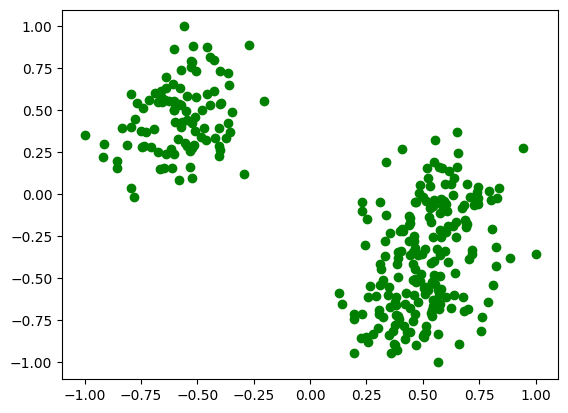

[array([[ 0.28118049, -0.9596549 ],
       [ 0.62368072,  0.78167919],
       [-0.83175713, -0.5551397 ]]), array([[ 0.53258585, -0.84932025],
       [ 0.55650707, -1.51834569],
       [ 0.18169093, -2.75085441]]), array([[ 0.18189611, -0.27559264],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]]), array([[ 0.55255014, -0.66402084],
       [-0.17373752, -0.91534431],
       [ 0.        ,  0.        ]])]


In [ ]:
from sklearn.cluster import KMeans

data = np.load("datasets/synthetic-gaussian.npy")
p = PrivacyBudget(epsilon=1, method="series sum", total_iter=3)
centers = dplloyd(k=3, X=data, n_iter=3, priv=p, seed=123, return_steps=True)
first = centers[0]
second = centers[1]
third = centers[2]

#non_private_centers = KMeans(n_clusters=3).fit(data).cluster_centers_

fig = plt.figure()
ax = plt.axes()
ax.scatter(data[:,0], data[:,1], c='green')
#ax.scatter(non_private_centers[:,0], non_private_centers[:,1], c='red')
ax.plot(first[:,0], first[:,1], c="pink")
ax.plot(second[:,0], second[:,1], c="yellow")
ax.plot(third[:,0], third[:,1], c="cyan")
plt.show()

print(centers)

In [ ]:
data = np.load("datasets/synthetic-gaussian.npy")

# lets vary number of iterations for e=1, k=4 and series sum privacy budget

for total_iterations in range(2,15):
    p = PrivacyBudget(epsilon=1, method="series sum", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"base seed={base_seed}, iterations={total_iterations}, average loss={np.mean(losses)}")

base seed=36390, iterations=2, average loss=2.9010913190395082, first center=[[ 1.18801221  1.15541731 -0.56270149]
 [ 1.16211538  1.3349186  -0.91898429]
 [ 0.63612165  0.40392952  0.08119243]
 [ 2.96367967  2.75565521 -1.60229992]]
base seed=46672, iterations=3, average loss=1.056481135057226, first center=[[0.99440751 1.9218712  3.79232277]
 [0.26987531 0.61329791 2.07893793]
 [0.31265587 0.34580666 0.9689888 ]
 [2.09331825 3.37266638 6.4520216 ]]
base seed=49779, iterations=4, average loss=0.9534946441122214, first center=[[ 0.19108474  0.1746858   0.20638254]
 [ 2.57748861  5.34927166 -1.96097396]
 [ 1.03890567  2.17036518 -0.81906109]
 [ 1.28558271  2.31627805 -0.5076525 ]]
base seed=4380, iterations=5, average loss=1.1053191213826306, first center=[[-6.51023359e-02  2.86928234e-02  2.30923148e-01]
 [-5.46217446e+02 -1.01896025e+00 -7.47580293e+01]
 [-5.64949043e+08  4.34184415e+07 -1.06395765e+08]
 [-8.74812929e+00  1.20920583e+00 -1.57957479e+00]]
base seed=54656, iterations=6,

In [3]:
# dichotomy privacy budget

for total_iterations in range(2,15):
    p = PrivacyBudget(epsilon=1, method="dichotomy", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"iterations={total_iterations}, average loss={np.mean(losses)}")

iterations=2, average loss=0.898961207536427
iterations=3, average loss=0.691876239704087
iterations=4, average loss=0.7186181458565366
iterations=5, average loss=0.8106883033723505
iterations=6, average loss=0.9254733988944123
iterations=7, average loss=1.0731369797415502
iterations=8, average loss=1.430081094760871
iterations=9, average loss=0.9506846900374233
iterations=10, average loss=2.0002719006184626
iterations=11, average loss=2.3977428838064188
iterations=12, average loss=3.361524263565716
iterations=13, average loss=1.9635114142546637
iterations=14, average loss=1.7690080581946823


In [4]:
# uniform privacy budget

for total_iterations in range(2,15):
    p = PrivacyBudget(epsilon=1, method="uniform", total_iter=total_iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=4, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]
    print(f"iterations={total_iterations}, average loss={np.mean(losses)}")

iterations=2, average loss=0.5090871655990092
iterations=3, average loss=0.659737628825259
iterations=4, average loss=0.7861964202982745
iterations=5, average loss=0.9585381006386428
iterations=6, average loss=2.2909135801780325
iterations=7, average loss=5.753587313589245
iterations=8, average loss=1.2618196215750597e+17
iterations=9, average loss=36.909046251703344
iterations=10, average loss=3.1910272340196454e+17
iterations=11, average loss=3.761065772911058e+17
iterations=12, average loss=331.7787199660372
iterations=13, average loss=7.2439970625820465
iterations=14, average loss=4.047117921266861e+18


### Based on these initial results, dichotomy with iterations between 3 and 5 may be a good choice. 

In [ ]:
# Varying K 

for k in range(2, 9):
    p = PrivacyBudget(epsilon=1, method="series sum", total_iter=4)

    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=k, X=data, n_iter=total_iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, data) for centers in trials]

    print(f"k={k}, average loss={np.mean(losses)}")



[np.float64(1.1298866177907585), np.float64(0.7685154008052362), np.float64(4.6510554920305545), np.float64(3.0756037053082363), np.float64(13.42416340469369), np.float64(4.752333094577605), np.float64(3.313769231176553), np.float64(0.6922898224832911), np.float64(1.8675141486695674), np.float64(1.4466064411941704), np.float64(2.3200590781497237), np.float64(1.639717702761888), np.float64(0.6991628555203583), np.float64(0.6755882807119039), np.float64(1.2199034870976921), np.float64(0.8430810394170778), np.float64(1.9394909288172366), np.float64(2.6171562786580083), np.float64(1.2347016505819888), np.float64(2.4543488128114874)]
k=2, average loss=2.5382473736628515
[np.float64(1.1298866177907585), np.float64(0.7685154008052362), np.float64(4.6510554920305545), np.float64(3.0756037053082363), np.float64(13.42416340469369), np.float64(4.752333094577605), np.float64(3.313769231176553), np.float64(0.6922898224832911), np.float64(1.8675141486695674), np.float64(1.4466064411941704), np.float

KeyboardInterrupt: 